In [1]:
import sys
sys.path.append('/anaconda/lib/python2.7/site-packages')

import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression

In [15]:
train_data = pd.read_csv('Train_Imp.csv', index_col = 0)

In [16]:
high_freq_df = train_data.ix[:, 28:207]
high_freq_df = high_freq_df.transpose()
(high_freq_df.ix[:, 0:9])

,0,1,2,3,4,5,6,7,8,9
Ret_2,0.000003,-4.871459e-04,-0.000782,2.773425e-04,-1.232316e-03,-5.736361e-06,3.110509e-07,1.761826e-04,-3.981190e-04,-0.003707
Ret_3,-0.000734,4.745645e-04,-0.000402,-8.845993e-05,2.448918e-06,9.142691e-04,-2.666059e-05,5.580175e-04,-1.796765e-04,-0.000614
Ret_4,-0.000738,1.737674e-06,0.000807,-1.989501e-04,-1.205046e-03,-2.472954e-04,-5.459490e-04,-6.963569e-06,-1.680062e-04,0.001855
Ret_5,-0.000007,-1.825559e-06,0.000400,-3.012594e-04,-2.083995e-05,9.275496e-04,-9.559389e-05,4.701422e-06,-7.337452e-04,0.000004
Ret_6,0.000423,-5.234522e-04,0.000656,7.110048e-04,4.511930e-06,NaN,2.014750e-05,-1.551532e-05,1.779418e-04,-0.002486
Ret_7,0.000438,-2.551758e-04,-0.001177,-4.311588e-04,6.233481e-04,-2.272352e-04,-2.733977e-04,-2.467405e-04,2.614606e-07,0.000622
Ret_8,-0.000076,-8.018733e-06,0.001198,-1.436305e-04,-1.842938e-03,-1.563942e-06,2.452139e-04,7.100424e-05,2.039926e-04,-0.000003
Ret_9,0.000645,4.843796e-05,0.000610,3.404036e-04,4.518627e-06,-5.588487e-07,2.992528e-04,1.670708e-04,-9.284421e-04,0.000012
Ret_10,-0.000006,-3.122019e-04,-0.001031,-6.393719e-04,1.226106e-03,2.316597e-04,-3.003194e-04,-7.287802e-04,NaN,-0.001229
Ret_11,0.000006,-7.417844e-04,0.000647,4.197873e-04,1.213068e-03,-2.146772e-04,-9.924456e-05,2.569327e-04,NaN,-0.000625


# For later processing, impute NaN in return data with 0

In [17]:
high_freq_df = np.nan_to_num(high_freq_df)
high_freq_df = pd.DataFrame(high_freq_df)

In [18]:
high_freq_df.ix[:, 0:9]

,0,1,2,3,4,5,6,7,8,9
0,0.000003,-4.871459e-04,-0.000782,2.773425e-04,-1.232316e-03,-5.736361e-06,3.110509e-07,1.761826e-04,-3.981190e-04,-0.003707
1,-0.000734,4.745645e-04,-0.000402,-8.845993e-05,2.448918e-06,9.142691e-04,-2.666059e-05,5.580175e-04,-1.796765e-04,-0.000614
2,-0.000738,1.737674e-06,0.000807,-1.989501e-04,-1.205046e-03,-2.472954e-04,-5.459490e-04,-6.963569e-06,-1.680062e-04,0.001855
3,-0.000007,-1.825559e-06,0.000400,-3.012594e-04,-2.083995e-05,9.275496e-04,-9.559389e-05,4.701422e-06,-7.337452e-04,0.000004
4,0.000423,-5.234522e-04,0.000656,7.110048e-04,4.511930e-06,0.000000e+00,2.014750e-05,-1.551532e-05,1.779418e-04,-0.002486
5,0.000438,-2.551758e-04,-0.001177,-4.311588e-04,6.233481e-04,-2.272352e-04,-2.733977e-04,-2.467405e-04,2.614606e-07,0.000622
6,-0.000076,-8.018733e-06,0.001198,-1.436305e-04,-1.842938e-03,-1.563942e-06,2.452139e-04,7.100424e-05,2.039926e-04,-0.000003
7,0.000645,4.843796e-05,0.000610,3.404036e-04,4.518627e-06,-5.588487e-07,2.992528e-04,1.670708e-04,-9.284421e-04,0.000012
8,-0.000006,-3.122019e-04,-0.001031,-6.393719e-04,1.226106e-03,2.316597e-04,-3.003194e-04,-7.287802e-04,0.000000e+00,-0.001229
9,0.000006,-7.417844e-04,0.000647,4.197873e-04,1.213068e-03,-2.146772e-04,-9.924456e-05,2.569327e-04,0.000000e+00,-0.000625


In [19]:
high_freq_df.shape

(179, 40000)

# Idea:

For each of the 40000 stocks, calculate 21 fourier coefficients for the first 120 mins (the # ofs coef can be determined later), and for the last 60 mins

Predict the last 60 mins' coef, based on the first 120 mins' coefs, and features (e.g. predict the difference using features).  Do variable selection. 

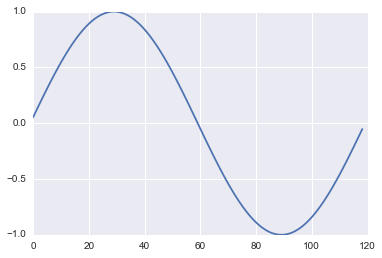

In [20]:
# Fourier basis
time = np.linspace(1, 119, 119)
period = 120
n = 2
basis = np.sin(n*np.pi*time/period)
plt.plot(basis)

In [21]:
# Fourier_1 : for projecting the first 120 min (to be exact, 119 min)
# Generate 1 constant basis, num_basis fourier sin basis, and num_basis fourier cos basis  - 21 in total

num_basis = 10 # the number of fourier sin basis

Fourier_1 = np.zeros((119, 2*num_basis+1))  # each col of Fouier is a basis

Fourier_1[:,0] = 1

for i in range(1, num_basis+1, 1):
    
    time = np.linspace(1, 119, 119)
    period = 120
    n = i
    basis = np.sin(n*np.pi*time/period)
    Fourier_1[:, i] = basis
    
for i in range(num_basis+1, 2*num_basis+1, 1):
    
    time = np.linspace(1, 119, 119)
    period = 120
    n = i - num_basis
    basis = np.cos(n*np.pi*time/period)
    Fourier_1[:, i] = basis

In [22]:
Fourier_1.shape

(119, 21)

In [23]:
# Fourier_2 : for projecting the last 60 min
# Generate 1 constant basis, num_basis fourier sin basis, and num_basis fourier cos basis  - 21 in total

num_basis = 10 # the number of fourier sin basis

Fourier_2 = np.zeros((60, 2*num_basis+1))  # each col of Fouier is a basis

Fourier_2[:,0] = 1

for i in range(1, num_basis+1, 1):
    
    time = np.linspace(1, 60, 60)
    period = 60
    n = i
    basis = np.sin(n*np.pi*time/period)
    Fourier_2[:, i] = basis
    
for i in range(num_basis+1, 2*num_basis+1, 1):
    
    time = np.linspace(1, 60, 60)
    period = 60
    n = i - num_basis
    basis = np.cos(n*np.pi*time/period)
    Fourier_2[:, i] = basis

In [24]:
Fourier_2.shape

(60, 21)

In [25]:
# Project the first 120 min data onto Fourier_1, output a dataframe

high_freq_df_train_part = high_freq_df.ix[0:118, :]
high_freq_df_train_part.shape

(119, 40000)

In [26]:
ForCoeff_1 = np.dot(high_freq_df_train_part.transpose(), Fourier_1)/(119/2)
ForCoeff_1 = pd.DataFrame(ForCoeff_1)
ForCoeff_1.shape

(40000, 21)

In [27]:
# Project the last 60 min data onto Fourier_1, output a dataframe

high_freq_df_test_part = high_freq_df.ix[119:179, :]
high_freq_df_test_part.shape

(60, 40000)

In [28]:
ForCoeff_2 = np.dot(high_freq_df_test_part.transpose(), Fourier_2)/(60/2)
ForCoeff_2 = pd.DataFrame(ForCoeff_2)
ForCoeff_2.shape

(40000, 21)

In [29]:
ForDiff = ForCoeff_2 - ForCoeff_1
ForDiff.shape

(40000, 21)

In [30]:
# Save the data into a file

high_freq_model_data_1 = pd.concat([train_data.ix[:,0:26], ForCoeff_1, ForCoeff_2], axis = 1) # includes ForCoeff_2, ForCoeff_1

high_freq_model_data_1.columns = ['Id', 'f1','f2','f3','f4','f5','f6','f7','f8','f9','f10',
                                  'f11','f12','f13','f14','f15','f16','f17','f18','f19','f20',
                                  'f21','f22','f23','f24','f25']+ range(1, 43, 1)

high_freq_model_data_2 = pd.concat([train_data.ix[:,0:26], ForDiff], axis = 1) # includes ForDiff

high_freq_model_data_2.columns = ['Id', 'f1','f2','f3','f4','f5','f6','f7','f8','f9','f10',
                                  'f11','f12','f13','f14','f15','f16','f17','f18','f19','f20',
                                  'f21','f22','f23','f24','f25']+ range(1, 22, 1)

In [31]:
high_freq_model_data_2.head(10)

,Id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,12,13,14,15,16,17,18,19,20,21
0,1,1,-0.389162,0.437228,0.403516,8,0.055564,75751,0.2254,11,...,-0.000409,-0.000485,0.000363,-0.000094,-0.000020,-0.000264,0.000325,-0.000154,-0.000426,-0.000316
1,2,1,-0.389162,0.437228,0.403516,3,0.388896,17369,0.0166,13,...,0.000075,-0.000083,0.000060,0.000115,-0.000152,-0.000014,0.000045,-0.000071,0.000010,0.000120
2,3,1,-0.696727,0.739591,-0.167928,9,0.471947,8277,0.3650,9,...,-0.000059,-0.000026,-0.000115,0.000031,-0.000005,0.000073,0.000033,0.000240,-0.000024,0.000061
3,4,1,-0.694350,1.568248,0.479073,5,0.120653,22508,0.2654,13,...,-0.000049,0.000062,-0.000103,-0.000054,0.000020,0.000018,-0.000038,0.000076,0.000073,-0.000023
4,5,6,-1.736489,2.765531,1.245280,7,4.866985,22423,0.2138,13,...,-0.000085,0.000155,0.000019,0.000132,0.000105,0.000155,-0.000017,-0.000032,-0.000107,0.000155
5,6,1,-0.389162,-0.680515,0.403516,1,0.227034,24099,0.2064,8,...,-0.000303,0.000280,-0.000240,-0.000004,0.000172,0.000051,0.000316,-0.000155,-0.000058,-0.000113
6,7,1,-0.230636,-0.227021,-0.084126,7,-0.095007,39351,0.3650,13,...,0.000048,-0.000065,-0.000016,0.000051,-0.000034,-0.000098,-0.000012,0.000042,0.000036,-0.000092
7,8,1,2.582955,0.157344,0.617261,8,-0.177333,92214,0.2119,8,...,-0.000004,0.000157,-0.000008,-0.000126,0.000046,0.000139,-0.000172,0.000049,-0.000053,-0.000148
8,9,1,-0.187950,-0.259820,0.047637,8,-0.381621,18418,0.3583,8,...,0.000131,0.000078,0.000052,0.000035,0.000125,-0.000018,0.000048,0.000061,0.000039,0.000229
9,10,1,2.883570,0.813783,0.796746,7,0.021982,47637,0.2654,6,...,0.000136,-0.000126,-0.000247,0.000407,0.000051,0.000043,0.000324,0.000051,0.000164,0.000336


In [32]:
ForCoeff_1.describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,40000.000000,40000.000000,4.000000e+04,40000.000000,40000.000000,4.000000e+04,4.000000e+04,40000.000000,4.000000e+04,40000.000000,...,4.000000e+04,4.000000e+04,4.000000e+04,40000.000000,4.000000e+04,40000.000000,40000.000000,4.000000e+04,4.000000e+04,40000.000000
mean,-0.000003,-0.000001,5.344702e-07,-0.000005,0.000003,-3.381558e-06,1.227418e-07,0.000008,-3.682696e-06,0.000005,...,8.807421e-07,-2.069165e-06,1.301853e-06,0.000003,-2.805889e-06,0.000009,-0.000003,-7.554773e-07,2.245210e-06,-0.000004
std,0.000174,0.000122,1.290167e-04,0.000123,0.000128,1.351159e-04,1.383360e-04,0.000127,1.368151e-04,0.000119,...,1.254237e-04,1.235942e-04,1.301344e-04,0.000123,1.251941e-04,0.000139,0.000138,1.141701e-04,1.246122e-04,0.000117
min,-0.006008,-0.002385,-1.934910e-03,-0.008267,-0.009765,-1.005221e-02,-2.821774e-03,-0.002042,-1.423920e-02,-0.002828,...,-2.632855e-03,-7.792323e-03,-1.034062e-02,-0.004913,-2.936148e-03,-0.002042,-0.014390,-2.751413e-03,-2.297784e-03,-0.003210
25%,-0.000067,-0.000046,-4.631315e-05,-0.000048,-0.000044,-4.655199e-05,-4.436145e-05,-0.000042,-4.881639e-05,-0.000043,...,-4.485878e-05,-4.488808e-05,-4.535467e-05,-0.000043,-4.690724e-05,-0.000041,-0.000048,-4.713526e-05,-4.640530e-05,-0.000050
50%,-0.000002,-0.000002,-6.299050e-07,-0.000002,0.000001,-5.177518e-07,1.367331e-06,0.000003,-9.182218e-07,0.000002,...,-3.624176e-07,-3.334646e-07,9.813527e-07,0.000002,-5.579967e-07,0.000004,-0.000001,-3.831786e-07,2.134850e-07,-0.000002
75%,0.000061,0.000042,4.422060e-05,0.000043,0.000047,4.564662e-05,4.661459e-05,0.000051,4.561720e-05,0.000050,...,4.418868e-05,4.477385e-05,4.817568e-05,0.000049,4.418554e-05,0.000050,0.000044,4.615595e-05,4.703620e-05,0.000044
max,0.004715,0.002732,9.602278e-03,0.002985,0.006724,2.407529e-03,1.175438e-02,0.007892,3.148582e-03,0.004394,...,6.036154e-03,2.560549e-03,3.928940e-03,0.002359,9.844119e-03,0.012940,0.002919,2.113861e-03,9.190433e-03,0.001903


In [33]:
ForCoeff_2.describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,40000.000000,40000.000000,4.000000e+04,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.000000,40000.000000,4.000000e+04,...,40000.000000,4.000000e+04,4.000000e+04,4.000000e+04,40000.000000,40000.000000,4.000000e+04,4.000000e+04,40000.000000,40000.000000
mean,-0.000008,-0.000004,-1.860825e-06,0.000003,-0.000003,0.000002,7.698472e-07,-0.000003,-0.000002,1.460342e-06,...,-0.000001,2.612541e-07,9.102438e-08,-4.905823e-06,0.000004,-0.000008,8.066441e-07,-2.872901e-06,0.000006,-0.000008
std,0.000297,0.000201,1.964751e-04,0.000202,0.000188,0.000197,2.122539e-04,0.000216,0.000194,1.976499e-04,...,0.000193,1.984130e-04,1.988214e-04,2.032476e-04,0.000203,0.000201,2.076838e-04,2.137713e-04,0.000192,0.000221
min,-0.010787,-0.006367,-1.006698e-02,-0.006599,-0.008058,-0.004439,-3.258945e-03,-0.010352,-0.004580,-4.909548e-03,...,-0.006594,-5.099082e-03,-4.744826e-03,-4.753005e-03,-0.002509,-0.006054,-5.018990e-03,-3.707161e-03,-0.002657,-0.006807
25%,-0.000097,-0.000068,-6.736670e-05,-0.000067,-0.000075,-0.000069,-7.509397e-05,-0.000078,-0.000073,-7.384324e-05,...,-0.000071,-6.705501e-05,-7.276622e-05,-7.431326e-05,-0.000072,-0.000077,-7.172965e-05,-7.603310e-05,-0.000070,-0.000076
50%,-0.000001,-0.000002,3.814000e-07,0.000004,-0.000003,0.000002,-7.517881e-07,-0.000001,-0.000001,-3.241703e-08,...,-0.000001,4.063759e-06,-3.375750e-06,-3.989714e-07,0.000002,-0.000003,6.060009e-07,7.057984e-07,0.000003,-0.000002
75%,0.000097,0.000064,6.825685e-05,0.000078,0.000067,0.000075,7.044131e-05,0.000071,0.000072,7.372065e-05,...,0.000067,7.612901e-05,6.656221e-05,7.220813e-05,0.000075,0.000069,7.532400e-05,7.660279e-05,0.000076,0.000074
max,0.004756,0.004468,3.343141e-03,0.003649,0.002556,0.006611,8.238949e-03,0.003875,0.003211,1.036517e-02,...,0.003033,3.668577e-03,7.289778e-03,7.810252e-03,0.007621,0.004367,4.418713e-03,1.465601e-02,0.006400,0.008479


In [34]:
ForDiff.describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.000000,40000.000000,40000.000000,...,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.000000,4.000000e+04
mean,-0.000005,-0.000003,-0.000002,0.000008,-0.000006,0.000005,6.471054e-07,-0.000011,0.000002,-0.000003,...,-0.000002,0.000002,-0.000001,-0.000008,0.000007,-0.000016,0.000004,-2.117424e-06,0.000003,-4.525128e-06
std,0.000350,0.000240,0.000248,0.000225,0.000226,0.000236,2.258669e-04,0.000251,0.000229,0.000234,...,0.000232,0.000229,0.000245,0.000230,0.000225,0.000246,0.000232,2.501037e-04,0.000220,2.496881e-04
min,-0.011951,-0.007206,-0.019669,-0.009225,-0.014782,-0.003296,-5.059550e-03,-0.012305,-0.004351,-0.008530,...,-0.012630,-0.006086,-0.008674,-0.003706,-0.003233,-0.011827,-0.004911,-4.188337e-03,-0.003407,-6.642850e-03
25%,-0.000112,-0.000082,-0.000083,-0.000078,-0.000091,-0.000084,-8.883796e-05,-0.000099,-0.000087,-0.000090,...,-0.000084,-0.000081,-0.000089,-0.000093,-0.000084,-0.000097,-0.000085,-8.978916e-05,-0.000085,-8.961331e-05
50%,0.000003,0.000002,0.000001,0.000006,-0.000005,0.000004,-2.896770e-06,-0.000005,-0.000002,-0.000001,...,-0.000001,0.000003,-0.000004,-0.000002,0.000002,-0.000006,0.000002,5.133333e-07,0.000002,-5.045962e-07
75%,0.000122,0.000083,0.000086,0.000095,0.000080,0.000092,8.304991e-05,0.000083,0.000087,0.000085,...,0.000081,0.000089,0.000083,0.000084,0.000090,0.000078,0.000090,9.189006e-05,0.000089,9.068439e-05
max,0.009922,0.004046,0.004724,0.004131,0.009278,0.011142,7.235249e-03,0.003339,0.009659,0.012258,...,0.004826,0.004378,0.017630,0.007612,0.008785,0.003721,0.010127,1.735156e-02,0.004824,8.522257e-03


In [59]:
high_freq_model_data_1.to_csv('high_freq_model_data_1.csv')
high_freq_model_data_2.to_csv('high_freq_model_data_2.csv')

# Multitask Regresion (start from high_freq_model_data_2)

Here, we treat all feature as numeric, and we use group lasso.  The penalty coefficient is chosen by cross-validation

Things that we haven't take into concern:

1. Weight

In [100]:
from sklearn.linear_model import MultiTaskLasso, Lasso

Features = train_data.ix[:, 1:26]

penalty_coef_list = np.linspace(0, 1.5, 16)

score_list = []

for penalty in penalty_coef_list:
    
    GP_Lasso_model = MultiTaskLasso(alpha=penalty)
    this_scores = sklearn.cross_validation.cross_val_score(GP_Lasso_model, Features, ForDiff, scoring = 'mean_absolute_error',cv = 5)
    score_list.append(np.mean(this_scores))

print penalty_coef_list

print score_list

# No matter whether the score is + or -, the higher the score, the better

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5]
[-0.00014099582355742344, -0.00014075820754919015, -0.00014074805458423714, -0.0001407420187695899, -0.00014074004442242351, -0.00014074232541915198, -0.00014074889928494895, -0.00014075957051841995, -0.00014076406620187781, -0.00014076406620187781, -0.00014076406620187781, -0.00014076406620187781, -0.00014076406620187781, -0.00014076406620187781, -0.00014076406620187781, -0.00014076406620187781]


In [109]:
# Choose penalty_coef = 0.4

Model_1 = MultiTaskLasso(alpha=0.4).fit(Features, ForDiff)
print pd.DataFrame(Model_1.coef_)

    0   1   2   3   4   5             6   7   8   9  ...  15  16  17  18  19  \
0    0   0   0   0   0   0 -1.612697e-11   0   0   0 ...   0   0   0   0   0   
1    0   0   0   0   0   0  1.088688e-10   0   0   0 ...   0   0   0   0   0   
2    0   0   0   0   0   0 -1.691802e-11   0   0   0 ...   0   0   0   0   0   
3    0   0   0   0   0   0 -1.123140e-10   0   0   0 ...   0   0   0   0   0   
4    0   0   0   0   0   0  4.698126e-11   0   0   0 ...   0   0   0   0   0   
5    0   0   0   0   0   0 -8.634407e-11   0   0   0 ...   0   0   0   0   0   
6    0   0   0   0   0   0 -6.637884e-11   0   0   0 ...   0   0   0   0   0   
7    0   0   0   0   0   0 -8.359310e-11   0   0   0 ...   0   0   0   0   0   
8    0   0   0   0   0   0  7.672584e-11   0   0   0 ...   0   0   0   0   0   
9    0   0   0   0   0   0 -1.302924e-10   0   0   0 ...   0   0   0   0   0   
10   0   0   0   0   0   0 -3.373161e-11   0   0   0 ...   0   0   0   0   0   
11   0   0   0   0   0   0 -9.782410e-12

Only feature 7 shows some signal

In [106]:
Model_1_predict = Model_1.predict(Features)

In [107]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print mean_absolute_error(Model_1_predict, ForDiff)
print mean_squared_error(Model_1_predict, ForDiff)

0.000140731813983
5.82717642924e-08


In [108]:
print mean_absolute_error(np.zeros((40000, 21)), ForDiff)
print mean_squared_error(np.zeros((40000, 21)), ForDiff)

0.000140734027892
5.83303912993e-08


So we are not doing much better than the "zero-difference" prediction

If this is true, it means that we can use the 1st-part fourier coefficient as the 2nd-part fourier coefficient, and reconstruct the 2nd-part using fourier series.

In [35]:
# Now to convert Feature 5, 10, 13, 20 into indicator variables, 
# log-transform Feature 7
# and re-run the above process
high_freq_model_data_2 = pd.read_csv('high_freq_model_data_2.csv', index_col=0)

In [ ]:
# I tried log-transform the Feature-7, but the result get worse...
# So I retreat to the orginal one

In [63]:
Features = high_freq_model_data_2.ix[:,1:26]

New_Features = pd.concat([Features.ix[:, 0:4],
                          pd.get_dummies(Features.ix[:, 4]),
                          Features.ix[:, 5:9],
                          pd.get_dummies(Features.ix[:, 9]),
                          Features.ix[:, 10:12],
                          pd.get_dummies(Features.ix[:, 12]),
                          Features.ix[:, 13:19],
                          pd.get_dummies(Features.ix[:, 19]),
                          Features.ix[:, 20:25]], axis = 1
                          )

In [64]:
New_Features.shape

(40000, 56)

In [65]:
from sklearn.linear_model import MultiTaskLasso, Lasso

penalty_coef_list = np.linspace(0, 1.5, 16)

score_list = []

for penalty in penalty_coef_list:
    
    GP_Lasso_model = MultiTaskLasso(alpha=penalty)
    this_scores = sklearn.cross_validation.cross_val_score(GP_Lasso_model, New_Features, ForDiff, scoring = 'mean_absolute_error',cv = 5)
    score_list.append(np.mean(this_scores))

print penalty_coef_list

print score_list

# No matter whether the score is + or -, the higher the score, the better

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5]
[-0.00014116410873479124, -0.00014075820754919015, -0.00014074805458423714, -0.0001407420187695899, -0.00014074004442242351, -0.00014074232541915198, -0.00014074889928494895, -0.00014075957051841995, -0.00014076406620187781, -0.00014076406620187781, -0.00014076406620187781, -0.00014076406620187781, -0.00014076406620187781, -0.00014076406620187781, -0.00014076406620187781, -0.00014076406620187781]


In [66]:
Model_2 = MultiTaskLasso(alpha=0.4).fit(New_Features, ForDiff)
print pd.DataFrame(Model_2.coef_)

    0   1   2   3   4   5   6   7   8   9  ...  46  47  48  49  50  51  52  \
0    0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
1    0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
2    0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
3    0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
4    0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
5    0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
6    0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
7    0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
8    0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
9    0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
10   0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
11   0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0  

In [67]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Model_2_predict = Model_2.predict(New_Features)

print mean_absolute_error(Model_2_predict, ForDiff)
print mean_squared_error(Model_2_predict, ForDiff)

0.000140731813983
5.82717642924e-08


In [68]:
print mean_absolute_error(np.zeros((40000, 21)), ForDiff)
print mean_squared_error(np.zeros((40000, 21)), ForDiff)

0.000140734027892
5.83303912993e-08
